**1.
 IMPORTING THE REQUIRED LIBRARIES FOR EDA**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

**1.1 LOADING THE DATA INTO THE** **DATAFRAME**

In [62]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data.csv


In [63]:
import io
df=pd.read_csv(io.BytesIO(uploaded["data.csv"]))
df.head(5)

ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

**1.2 CHECKING THE TYPES OF DATA AND ITS STATISTICS**

In [64]:
df.info

<bound method DataFrame.info of         ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]>

In [65]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [66]:
df.shape

(5000, 14)

In [67]:
df.isnull().values.any()

False

In [68]:
df[['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard',]].describe()

ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]

**2. Dropping Irrelevant Columns**

In [69]:
df.Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [70]:
experience=df["Experience"]
age=df["Age"]
correlation=age.corr(experience)
correlation

0.9942148569683321

In [71]:
df=df.drop(['ID','Experience'], axis=1)
df.head(5)

Age  Income  ZIP Code  ...  CD Account  Online  CreditCard
0   25      49     91107  ...           0       0           0
1   45      34     90089  ...           0       0           0
2   39      11     94720  ...           0       0           0
3   35     100     94112  ...           0       0           0
4   35      45     91330  ...           0       0           1

[5 rows x 12 columns]

In [72]:
duplicate=df[df.duplicated()]
print("No of duplicate rows : ",duplicate)

No of duplicate rows :  Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


**3. EDA : Studying the Data Distribution**

**3.1 No. of unique values in each column**

In [73]:
unique_no = df.nunique(axis = 0, dropna = True)
unique_no

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**3.2 No. of people with zero mortage**

In [74]:
zero_mortgage=df.Mortgage[df.Mortgage == 0].count()
print("People with zero mortgage:",zero_mortgage)

People with zero mortgage: 3462


**3.3 No. of people with zero credit card spending per month**

In [75]:
zero_cc_spend=df.CreditCard[df.CreditCard == 0].count()
print("People with zero credit card spending per month:" , zero_cc_spend)

People with zero credit card spending per month: 3530


**3.4 Value counts of all categorical columns.**

In [76]:
for x in df.columns:
  if df[x].nunique(dropna = True) == 2:
    print(x,": ")
    print(df[x].value_counts())

Personal Loan : 
0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Account : 
0    4478
1     522
Name: Securities Account, dtype: int64
CD Account : 
0    4698
1     302
Name: CD Account, dtype: int64
Online : 
1    2984
0    2016
Name: Online, dtype: int64
CreditCard : 
0    3530
1    1470
Name: CreditCard, dtype: int64


**3.5 Univariate and Bivariate analysis**

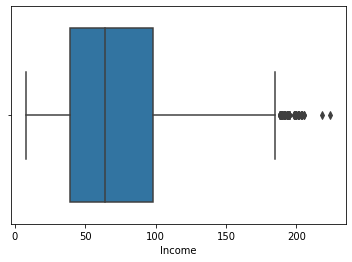

In [77]:
sns.boxplot(x=df["Income"])

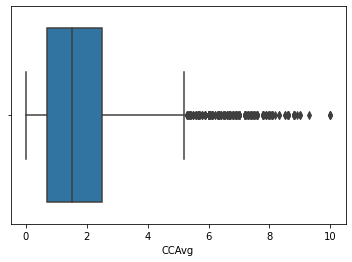

In [78]:
sns.boxplot(x=df["CCAvg"])

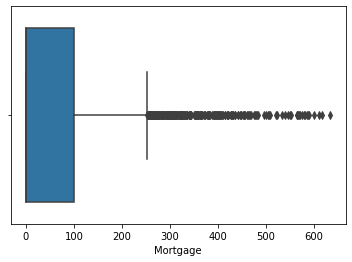

In [79]:
sns.boxplot(x=df["Mortgage"])

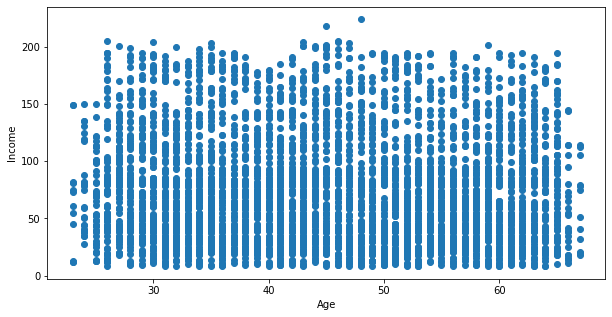

In [80]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Age'],df['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

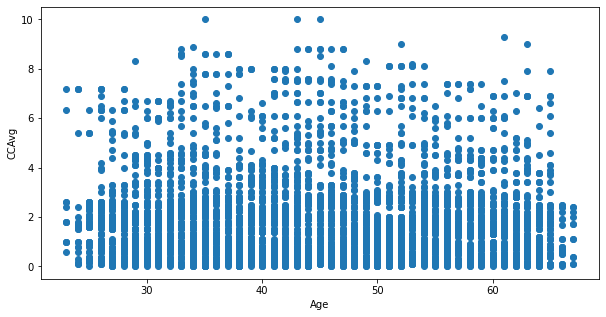

In [81]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Age'],df['CCAvg'])
ax.set_xlabel('Age')
ax.set_ylabel('CCAvg')
plt.show()

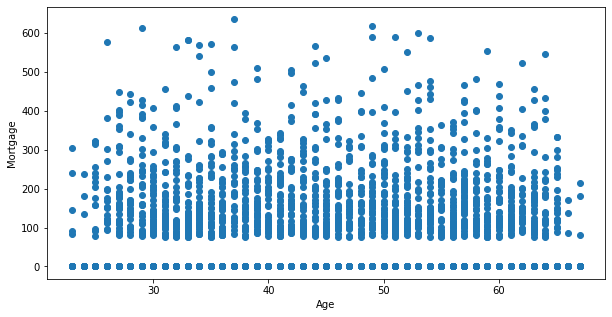

In [82]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Age'],df['Mortgage'])
ax.set_xlabel('Age')
ax.set_ylabel('Mortgage')
plt.show()

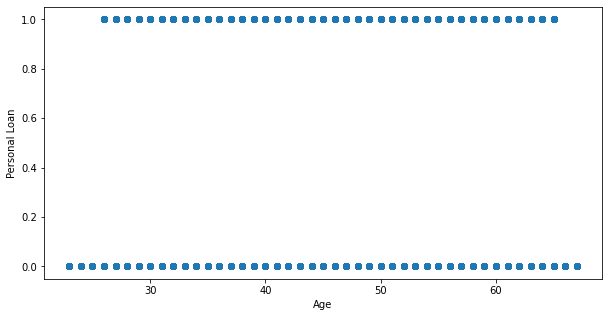

In [83]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df['Age'],df['Personal Loan'])
ax.set_xlabel('Age')
ax.set_ylabel('Personal Loan')
plt.show()

In [84]:
df.corr()

Age    Income  ...    Online  CreditCard
Age                 1.000000 -0.055269  ...  0.013702    0.007681
Income             -0.055269  1.000000  ...  0.014206   -0.002385
ZIP Code           -0.029216 -0.016410  ...  0.016990    0.007691
Family             -0.046418 -0.157501  ...  0.010354    0.011588
CCAvg              -0.052012  0.645984  ... -0.003611   -0.006689
Education           0.041334 -0.187524  ... -0.015004   -0.011014
Mortgage           -0.012539  0.206806  ... -0.005995   -0.007231
Personal Loan      -0.007726  0.502462  ...  0.006278    0.002802
Securities Account -0.000436 -0.002616  ...  0.012627   -0.015028
CD Account          0.008043  0.169738  ...  0.175880    0.278644
Online              0.013702  0.014206  ...  1.000000    0.004210
CreditCard          0.007681 -0.002385  ...  0.004210    1.000000

[12 rows x 12 columns]

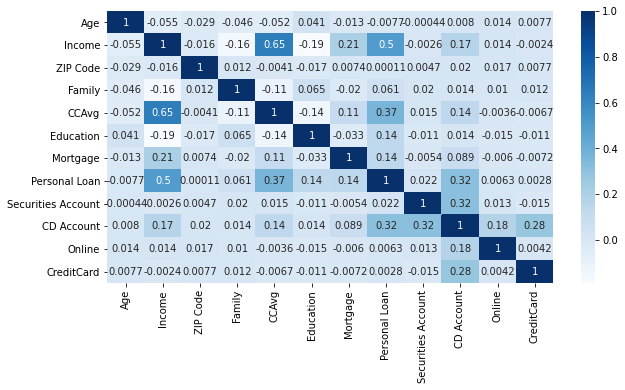

In [85]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap = "Blues",annot = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


Text(0.5, 0, 'Securities Account')

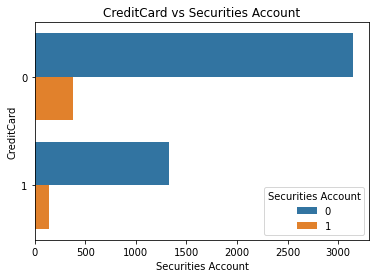

In [87]:
sns.countplot(y='CreditCard', data = df , hue = 'Securities Account')
plt.title('CreditCard vs Securities Account')
plt.ylabel('CreditCard')
plt.xlabel('Securities Account')

Text(0.5, 0, 'Personal Loan')

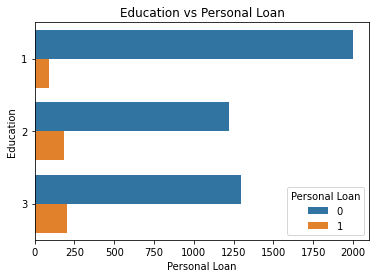

In [88]:
sns.countplot(y='Education', data = df , hue = 'Personal Loan')
plt.title('Education vs Personal Loan')
plt.ylabel('Education')
plt.xlabel('Personal Loan')

**4. Applying necessary transformations for the feature variables**

In [89]:
X=df[['Age','Income','CCAvg','Education','Mortgage','Securities Account','Online',"CreditCard"]].values
y=df['Personal Loan'].values

In [90]:
X

array([[25. , 49. ,  1.6, ...,  1. ,  0. ,  0. ],
       [45. , 34. ,  1.5, ...,  1. ,  0. ,  0. ],
       [39. , 11. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [63. , 24. ,  0.3, ...,  0. ,  0. ,  0. ],
       [65. , 49. ,  0.5, ...,  0. ,  1. ,  0. ],
       [28. , 83. ,  0.8, ...,  0. ,  1. ,  1. ]])

In [91]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
X.shape

(5000, 8)

In [95]:
y.shape

(5000,)

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
#y=sc.fit_transform(y.reshape(-1,1))

In [97]:
X

array([[-1.77441684, -0.53822878, -0.19338544, ...,  2.92891517,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.8641094 , -0.25061056, ...,  2.92891517,
        -1.21661774, -0.64531434],
       [-0.55299157, -1.36379301, -0.53673618, ..., -0.34142334,
        -1.21661774, -0.64531434],
       ...,
       [ 1.54088033, -1.08136314, -0.93731205, ..., -0.34142334,
        -1.21661774, -0.64531434],
       [ 1.71536965, -0.53822878, -0.8228618 , ..., -0.34142334,
         0.82195086, -0.64531434],
       [-1.51268285,  0.20043396, -0.65118643, ..., -0.34142334,
         0.82195086,  1.54963239]])

In [98]:
y

array([0, 0, 0, ..., 0, 0, 0])

**5. Normalising the data and spliting the data into training and test set**

**5.1 Normalising the data** 

In [99]:
from sklearn import preprocessing
X=preprocessing.normalize(X)
X

array([[-0.45275242, -0.13733209, -0.04934338, ...,  0.74732915,
        -0.31042685, -0.16465558],
       [-0.00828626, -0.24252587, -0.07033779, ...,  0.82204603,
        -0.34146287, -0.1811176 ],
       [-0.22812463, -0.5626031 , -0.22141882, ..., -0.14084676,
        -0.50188915, -0.26621037],
       ...,
       [ 0.52791266, -0.37047997, -0.3211274 , ..., -0.1169732 ,
        -0.41681881, -0.22108765],
       [ 0.73501462, -0.23062435, -0.35258607, ..., -0.14629567,
         0.35219575, -0.27650919],
       [-0.55776679,  0.07390538, -0.24010992, ..., -0.12589195,
         0.30307535,  0.57139107]])

**5.2 Splitting the data into train and test set**

In [100]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=0)

In [101]:
X_train

array([[-0.18273183,  0.41040748,  0.75238478, ..., -0.0765766 ,
         0.18435236,  0.3475614 ],
       [ 0.61750792,  0.31769885,  0.31487539, ..., -0.17688675,
         0.42584148, -0.33432851],
       [ 0.49414667, -0.29907662, -0.08650719, ..., -0.15272904,
         0.36768361, -0.28866872],
       ...,
       [-0.51894968, -0.33261161, -0.18269388, ..., -0.10501687,
        -0.37421396,  0.47664444],
       [ 0.25015183, -0.13233465, -0.06161778, ...,  0.72013425,
         0.20209358,  0.38100911],
       [-0.4349237 , -0.31401657,  0.03746997, ..., -0.13794583,
        -0.49155205, -0.2607274 ]])

In [102]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [103]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3500, 8), (1500, 8), (3500,), (1500,))

**6. Using Logistic Regression model to predict the likelihood of a customer buying
personal loans.**

In [104]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
y_predict=model.predict(X_test)
print(y_predict)

[0 0 0 ... 0 0 0]


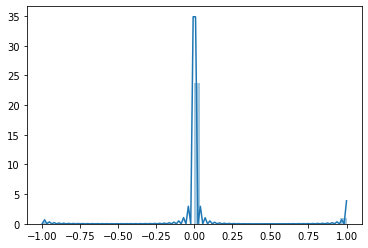

In [106]:
sns.distplot((y_test - y_predict),bins = 50)

**7.Metrics related for evaluating the model performance**

In [107]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

Mean Absolute Error:  0.048
Root Mean Squared Error 0.21908902300206645


In [108]:
accuracy = metrics.accuracy_score(y_test,y_predict)
print('Accuracy: ',accuracy)

Accuracy:  0.952


In [109]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test,y_predict))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.81      0.57      0.67       128

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.95      0.95      0.95      1500



In [110]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,y_predict))

Confusion Matrix:

[[1355   17]
 [  55   73]]


**8.Comparison with other classification algorithm**



**8.1 Support Vector Machine**

In [111]:
from sklearn.svm import SVC
SVM=SVC(kernel="linear")
SVM.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [112]:
y_predict_SVM=SVM.predict(X_test)
print(y_predict_SVM)

[0 0 0 ... 0 0 0]


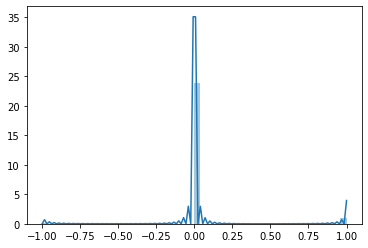

In [113]:
sns.distplot((y_test - y_predict_SVM),bins = 50)

In [114]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict_SVM))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict_SVM)))

Mean Absolute Error:  0.042
Root Mean Squared Error 0.20493901531919198


In [115]:
accuracy = metrics.accuracy_score(y_test,y_predict_SVM)
print('Accuracy: ',accuracy)

Accuracy:  0.958


In [116]:
print("Classification Report:\n")
print(classification_report(y_test,y_predict_SVM))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1372
           1       0.91      0.56      0.70       128

    accuracy                           0.96      1500
   macro avg       0.94      0.78      0.84      1500
weighted avg       0.96      0.96      0.95      1500



In [117]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,y_predict_SVM))

Confusion Matrix:

[[1365    7]
 [  56   72]]


**8.2 K-Neighbors classifier**

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [119]:
y_predict_knn=knn.predict(X_test)
print(y_predict_knn)

[0 0 0 ... 0 0 0]


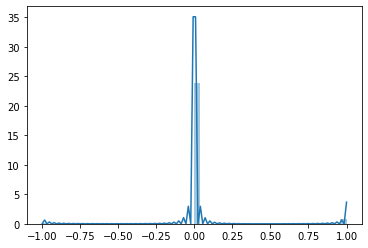

In [120]:
sns.distplot((y_test - y_predict_knn),bins = 50)

In [121]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict_knn))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict_knn)))

Mean Absolute Error:  0.042666666666666665
Root Mean Squared Error 0.2065591117977289


In [122]:
accuracy = metrics.accuracy_score(y_test,y_predict_knn)
print('Accuracy: ',accuracy)

Accuracy:  0.9573333333333334


In [123]:
print("Classification Report:\n")
print(classification_report(y_test,y_predict_knn))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1372
           1       0.86      0.59      0.70       128

    accuracy                           0.96      1500
   macro avg       0.91      0.79      0.84      1500
weighted avg       0.95      0.96      0.95      1500



In [124]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,y_predict_knn))

Confusion Matrix:

[[1360   12]
 [  52   76]]


**8.3 Naive-Bayes Classifier**

In [125]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [126]:
y_predict_nb = NB.predict(X_test)
print(y_predict_nb)

[0 0 0 ... 0 0 0]


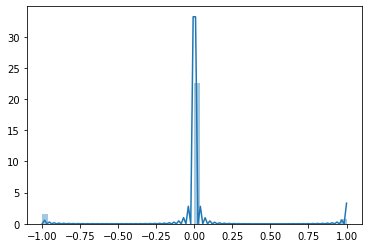

In [127]:
sns.distplot((y_test - y_predict_nb),bins = 50)

In [128]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict_nb))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict_nb)))

Mean Absolute Error:  0.094
Root Mean Squared Error 0.3065941943351178


In [129]:
accuracy = metrics.accuracy_score(y_test,y_predict_nb)
print('Accuracy: ',accuracy)

Accuracy:  0.906


In [130]:
print("Classification Report:\n")
print(classification_report(y_test,y_predict_nb))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1372
           1       0.46      0.63      0.53       128

    accuracy                           0.91      1500
   macro avg       0.71      0.78      0.74      1500
weighted avg       0.92      0.91      0.91      1500



In [131]:
print("Confusion Matrix:\n")
print(confusion_matrix(y_test,y_predict_nb))

Confusion Matrix:

[[1278   94]
 [  47   81]]


After Comparing the above results on this dataset, I have concluded that Support Vector Machine gave the highest accuracy follwed by K-Neighbors Classifier with Logistic Regression being the third lead and Naive-Bayes having the minimum accuracy.

**9.Business understanding of the model**

Bank Service is an essential worldwide service. Considering this fact ,I have decided to build a Machine Learning Classification Model to support this service by helping it to predict the likelihood of a liability customer buying personal loans. 

The model has been built considering the fact that identification of potential customers who have a higher probability of purchasing Personal Loans will not only help in the growth of the Bank's profit but also will help decrease the cost of organinsing manual campaigns to spot out the same.

The Dataset contains some basic information about the Banks's customers including the parituclars about the fact that they have bought Personal Loans or not. The Dataset with some pre-processing is used to train and test our model to make it suitable for achieving our goal.

Our model aims at providing the maximum accuracy and help in boosting the Bank's overall income from its customers by leading the Bank to approach its customers who are more likely to buy Personal Loans.
